# Titanic Example: Survival Prognosis

This is a typical case of function prediction. We want to find a function which takes some input parameters (information about the passenger) also called **features** and its value will tell us, if its likely that the particular passenger survived the catastrophic sinking of the titanic:

Example: $f(passenger_{age},passenger_{class}) = pred$ where $pred \in \{0,1\}$ where $0 \rightarrow Dead$ and $0 \rightarrow Alive$:

For a passenger with an age of nine years travelling in the first class, a sample output of our function could be:

$f(9, 1) = 1$

This is what we want our AI to say us!

## Data analysis and prepartion

Lets look at the data we want to learn this function from. This data is contained in a csv file, which we will read using python with the pandas package.
Further information on pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [3]:
import pandas as pd

In [4]:
titanicData = pd.read_csv('titanic.csv', sep=';')

Lets look at the information contained in that dataset:

First we will just look at the first 15 passengers, to find out which attributes of the passenger we can use, to predict if he survived or not:

In [5]:
titanicData.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S
5,1.0,1.0,"Anderson, Mr. Harry",male,48,0.0,0.0,19952,"26,5500",E12,S
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63,1.0,0.0,13502,"77,9583",D7,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39,0.0,0.0,112050,"0,0000",A36,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2.0,0.0,11769,"51,4792",C101,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71,0.0,0.0,PC 17609,"49,5042",NaN,C


The way in which the data is presented here is only understandable for humans. We now need to transform it, so that a machine can understand that. There are also some features which are not relevant on the survival of a specific passenger like his **name** or where he **embarked** from.

### Cleaning up features. 
#### Starting with the feature `name`

From just looking at the dataframe, we can immediatley see that the name of the passenger does not contain an valuable information about his chance of survival the catastrophe. So lets drop this column from our dataframe:

In [6]:
titanicData = titanicData.drop(columns=['name'])

In [7]:
titanicData.head(1)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,female,29,0.0,0.0,24160,"211,3375",B5,S


#### Other irellevant features `cabin`, `embarked` and `ticket`

Machine Learning algortihms can bearly deal with `null` values. Just be looking at our dataframe above, we see for example, that the Cabin is bearly filled out in our dataframe. Lets let python give us more information on the dataframe:

In [8]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
pclass      1309 non-null float64
survived    1309 non-null float64
sex         1309 non-null object
age         1046 non-null object
sibsp       1309 non-null float64
parch       1309 non-null float64
ticket      1309 non-null object
fare        1308 non-null object
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(4), object(6)
memory usage: 102.4+ KB


We can see that there are only 295 not null values for the cabin feature: `295 non-null object`. Also the cabin feature is to ambigous to infer the survival chances of a passenger:

In [9]:
len(titanicData.cabin.unique())

187

So lets also get rid of this column!

In [10]:
titanicData = titanicData.drop(columns=['cabin'])

In [11]:
titanicData.head(1)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,female,29,0.0,0.0,24160,"211,3375",S


The feature `cabin` looks strange as well. Its type is object, so its nor numerical or categorical:

In [12]:
titanicData.ticket.unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

In [13]:
print("count of unique values: " + str(len(titanicData.ticket.unique()))) 

count of unique values: 930


The way the ticket is described is ambigous, sometimes its just a number like `3101266`. Other entries contain strings and numbers `SOTON/O2 3101272`. Further more, there are 930 different entries for about 1300 passengers. This is now information we can infer the chances of survival of a passenger. So lets get also rid of this feature!

In [14]:
titanicData = titanicData.drop(columns=['ticket'])
titanicData.head(1)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29,0.0,0.0,"211,3375",S


The feature `embarked` tells us, where the passenger got on board the titanic. There are following three locations listed:

In [15]:
titanicData.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

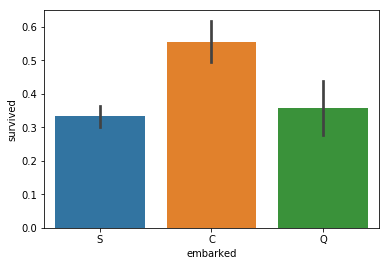

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = "embarked", y = "survived", data = titanicData)
plt.show()

It don't think that this information tells us much about the survival chances of an passenger. The survival chance may be affected by the class the passenger was travelling in, but knowing where he embarked from does not contain such information. So lets also drop this column.

In [18]:
titanicData = titanicData.drop(columns=['embarked'])
titanicData.head(1)

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29,0.0,0.0,"211,3375"


### Feature extraction/ Feature compression on `sibsp` and `parch`

This features gives us information about how much family members where with a particular passenger on board:

- `sibsp`: siblings / spouses on board
- `parch`: parents / childs

To keep things easy, lets infer a new feature out of this two features: `withfamily`
This feature will be categorical with:

- `0`: was travelling alone
- `1`: had some family aboard

In [19]:
import numpy as np
titanicData['withfamily'] = np.where(titanicData['sibsp'] + titanicData['parch'] > 0, 1, 0)
titanicData.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,withfamily
0,1.0,1.0,female,29,0.0,0.0,"211,3375",0
1,1.0,1.0,male,"0,9167",1.0,2.0,"151,5500",1
2,1.0,0.0,female,2,1.0,2.0,"151,5500",1
3,1.0,0.0,male,30,1.0,2.0,"151,5500",1
4,1.0,0.0,female,25,1.0,2.0,"151,5500",1
5,1.0,1.0,male,48,0.0,0.0,"26,5500",0
6,1.0,1.0,female,63,1.0,0.0,"77,9583",1
7,1.0,0.0,male,39,0.0,0.0,"0,0000",0
8,1.0,1.0,female,53,2.0,0.0,"51,4792",1
9,1.0,0.0,male,71,0.0,0.0,"49,5042",0


Now we can again reduce our dataset by dropping the columns `sibsp` and `parch`

In [20]:
titanicData = titanicData.drop(columns=['sibsp','parch'])
titanicData.head(1)



,pclass,survived,sex,age,fare,withfamily
0,1.0,1.0,female,29,"211,3375",0


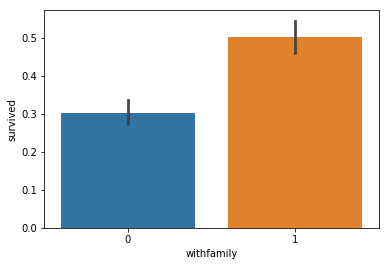

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = "withfamily", y = "survived", data = titanicData)
plt.show()

### Filling up `null` values on feature `age`

Looking at the information of the `age` feature, we can see that there are about 300 `null` values also its type is `object`. So we have some **missing values** here!
The feature `age` is never the less very important for us. 

We all know about the rule when leaving a sinking ship: **Frauen und Kinder zuerst!** (women and children first!).

In [22]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
pclass        1309 non-null float64
survived      1309 non-null float64
sex           1309 non-null object
age           1046 non-null object
fare          1308 non-null object
withfamily    1310 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 61.5+ KB


There is a whole part of research on how to fill such `null` values in a data set. For reasons of simplicity we just take the **mean** of the age of all other passengers to get rid of these `null` values. Taking the **median** could be another option, because it is not so heavily affected by outliners.

In [23]:
titanicData.age = titanicData.age.apply(lambda x: str(x).replace(',','.'))
titanicData = titanicData.astype({'age': 'float64'})
meanAgeOfAllPassengers = titanicData.age[titanicData.age.notnull()].mean()

print("The mean age on the titanic was: " + str(meanAgeOfAllPassengers))

titanicData.age.fillna(meanAgeOfAllPassengers, inplace=True)


The mean age on the titanic was: 29.8811345124283


Now we got rid of the `null` values:

In [24]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
pclass        1309 non-null float64
survived      1309 non-null float64
sex           1309 non-null object
age           1310 non-null float64
fare          1308 non-null object
withfamily    1310 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 61.5+ KB


We still can see that there are rows with null values present, but the count of the (`3` for example on `embarked`) is not very high. So lets get also rid of these rows in order to proceed without `null` values:

In [25]:
titanicData = titanicData.dropna()
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 6 columns):
pclass        1308 non-null float64
survived      1308 non-null float64
sex           1308 non-null object
age           1308 non-null float64
fare          1308 non-null object
withfamily    1308 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 71.5+ KB


In [26]:
titanicData.head(10)

,pclass,survived,sex,age,fare,withfamily
0,1.0,1.0,female,29.0000,"211,3375",0
1,1.0,1.0,male,0.9167,"151,5500",1
2,1.0,0.0,female,2.0000,"151,5500",1
3,1.0,0.0,male,30.0000,"151,5500",1
4,1.0,0.0,female,25.0000,"151,5500",1
5,1.0,1.0,male,48.0000,"26,5500",0
6,1.0,1.0,female,63.0000,"77,9583",1
7,1.0,0.0,male,39.0000,"0,0000",0
8,1.0,1.0,female,53.0000,"51,4792",1
9,1.0,0.0,male,71.0000,"49,5042",0


### Transforming the features: make them machine understandable

Now we have all features in place, we want to base our prediction on. Now we have to make that data machine understandable. Herefore we have to look at each column and transform them into the following three scale levels:

- *Categorical/nominal*: There are different categories which can not be sorted: `withfamily`, `sex`, `survived`
- *Categorical/ordinal*: There are different categories which can be sorted: `pclass`
- *Numeric/cardinal*: The values can be sorted and they express real numbers: `age`, `fare`


**Categorical/nominal features**

To encode the *Categorical/nominal* features we have to decribe them like `withfamily` is described:

- `0` -> no family
- `1` -> family on board

Applying this to `survived` and `sex`:

**survived**:
- `0` -> died
- `1` -> survived

**sex**:
- `0` -> male
- `1` -> female


In [27]:
titanicData['survived'] = np.where(titanicData['survived'] == 0.0, 0, 1)
titanicData['sex'] = np.where(titanicData['sex'] == 'male', 0, 1)
titanicData.head(1)

,pclass,survived,sex,age,fare,withfamily
0,1.0,1,1,29.0,"211,3375",0


The same operation has to be done with the `pclass` feature:

**pclass**
- `1.0` -> First class 
- `2.0` -> Second class
- `3.0` -> Thrid class

In [28]:
titanicData = titanicData.astype({'pclass': 'int32'})
titanicData.head(1)

,pclass,survived,sex,age,fare,withfamily
0,1,1,1,29.0,"211,3375",0


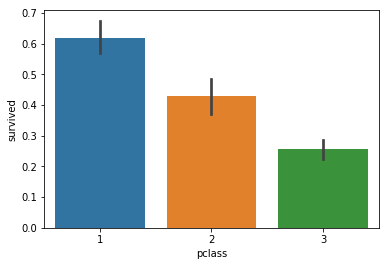

In [29]:
sns.barplot(x = "pclass", y = "survived", data = titanicData)
plt.show()

The feature `fare` desribes how much a passenger paid for his ticket. This is valuable information! We only have to get rid of the comma when representing the numeric values, in order to make it understandable for python how this feature needs to be understood:

In [30]:
titanicData.fare = titanicData.fare.apply(lambda x: x.replace(',','.'))
titanicData = titanicData.astype({'fare': 'float64'})
titanicData.head(1)

,pclass,survived,sex,age,fare,withfamily
0,1,1,1,29.0,211.3375,0


## Lets start the machine learning magic!

Now that we have all features in place and machine understandable, we can start learning from our dataset. To evalute the performance of our titanic AI, we need some validation mechanism.
Therefore we split our dataset into two datasets:

- **Training set**: This is our input for our machine learning algorithm. From this dataset it will learn the function between our given features and the survival of a specific passenger
- **Test set**: This set will be unknown to our machine learning algorithm. So the passengers in this set are unknown to the algorithm. We will use this data set to evaluate the performance of our trained model. It is normal to take between 10 or 20 percent of the original data set. This percentage is variable and depended on how much data there is in general

Another best practice is shuffling the dataset before we start learning from it

In [31]:
from sklearn.model_selection import train_test_split
titanicData = titanicData.sample(frac=1)
titanicTrainData, titanicTestData = train_test_split(titanicData, test_size=0.1)

**Training set**

In [32]:
titanicTrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 61 to 313
Data columns (total 6 columns):
pclass        1177 non-null int32
survived      1177 non-null int64
sex           1177 non-null int64
age           1177 non-null float64
fare          1177 non-null float64
withfamily    1177 non-null int64
dtypes: float64(2), int32(1), int64(3)
memory usage: 59.8 KB


**Test set**

In [33]:
titanicTestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1135 to 110
Data columns (total 6 columns):
pclass        131 non-null int32
survived      131 non-null int64
sex           131 non-null int64
age           131 non-null float64
fare          131 non-null float64
withfamily    131 non-null int64
dtypes: float64(2), int32(1), int64(3)
memory usage: 6.7 KB


Now, in order to learn from our data, we have to say what the input variables will be and what the corresponding value of the target variable for that is:

In [34]:
trainInput = titanicTrainData[['pclass', 'sex', 'age', 'fare', 'withfamily']]
targetVariable = titanicTrainData.survived


### Now we will train a **random forest** for the survival prediction:

In [35]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=150)
rfc.fit(trainInput, targetVariable)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now we can predict if the passengers in our test data set survived the catastrophe:

In [36]:
prediction = rfc.predict(titanicTestData[['pclass', 'sex', 'age', 'fare', 'withfamily']])
str(prediction)

'[0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1\n 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1\n 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0\n 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]'

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(titanicTestData.survived, prediction)

0.8091603053435115

We can ask the trained tree how import each feature is we provided for the training:

In [38]:
str(rfc.feature_importances_)

'[0.09455188 0.25314635 0.28676966 0.34564737 0.01988474]'

### Validating our prediction with a **logistic regression** for the survival prediction:

In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(trainInput, targetVariable)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
prediction=logmodel.predict(titanicTestData[['pclass', 'sex', 'age', 'fare', 'withfamily']])
accuracy_score(titanicTestData.survived, prediction)                                        

0.8244274809160306

### Predicting Probabilities with Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(trainInput, targetVariable)
print(naiveBayes.predict_proba(titanicTestData[['pclass', 'sex', 'age', 'fare', 'withfamily']])[0:10])

[[0.97244948 0.02755052]
 [0.29722203 0.70277797]
 [0.1875094  0.8124906 ]
 [0.01093639 0.98906361]
 [0.5238806  0.4761194 ]
 [0.55107779 0.44892221]
 [0.93560315 0.06439685]
 [0.9727845  0.0272155 ]
 [0.19549718 0.80450282]
 [0.48623811 0.51376189]]
